In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [2]:
path = 'data/spotify_most_streamed_2024.zip'
songs_unzipped = pd.read_csv(path, encoding='unicode_escape')

In [3]:
songs_unzipped

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


Now, I am going to unzip the file and read it again.

In [4]:
songs = pd.read_csv('data/Most Streamed Spotify Songs 2024.csv', encoding='unicode_escape')

In [5]:
songs

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [6]:
songs.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [7]:
songs.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

Bad looking column names!

In [8]:
def to_snake_case(column_name):
    column_name = column_name.replace(' ', '_')
    return column_name.lower()

In [9]:
songs.columns = [to_snake_case(col) for col in songs.columns]

In [10]:
songs.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

Better looking now <3

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

So, first of all, I need to see that in the `track` column there aren't any NaN values.

In [11]:
songs['track'].isna().unique()

array([False])

To find the artists with the most songs I am going to use the `value_counts()` method which returns a Series containing counts of unique values in descending order so that the first element is the most frequently-occurring element..

In [12]:
artist_song_counts = songs['artist'].value_counts()

In [13]:
artist_song_counts

artist
Drake                       63
Taylor Swift                63
Bad Bunny                   60
KAROL G                     32
The Weeknd                  31
                            ..
Carrier                      1
Javed Ali                    1
The King Khan & BBQ Show     1
Marca MP                     1
BUSHIDO ZHO                  1
Name: count, Length: 1999, dtype: int64

In [14]:
print("Top five artists with the most songs are:")
artist_song_counts.head(5)

Top five artists with the most songs are:


artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

In [15]:
songs.explicit_track

0       0
1       1
2       0
3       0
4       1
       ..
4595    1
4596    0
4597    1
4598    0
4599    1
Name: explicit_track, Length: 4600, dtype: int64

In [16]:
songs.explicit_track.unique()

array([0, 1], dtype=int64)

In [17]:
clean_songs = songs[songs['explicit_track'] == 0]
clean_songs

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",...,429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
12,LUNCH,HIT ME HARD AND SOFT,Billie Eilish,5/17/2024,USUM72401991,13,316.3,"221,636,195","13,800","197,280,692",...,45,138.0,"38,243,636",163.0,"1,354,692","1,219","1,313,357","450,344",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,Happiest Year,Feel Something (Deluxe),Jaymes Young,6/23/2017,USAT21903715,"4,540",19.5,"472,408,276","84,220","23,944,018",...,13,10.0,"101,920",1.0,"10,855,294","18,606",NaN,"1,724,972",NaN,0
4592,3 Haselnï¿½ï¿,3 Haselnï¿½ï¿½sse - Si,Jaques Raupï¿,12/1/2023,DEN062300845,"4,595",19.4,"25,822,176","15,387","2,650,670",...,NaN,9.0,"163,999",1.0,NaN,NaN,"33,508","312,177",NaN,0
4593,"Jaragandi (From ""Game Changer"") (Telugu)","Jaragandi (From ""Game Changer"") (Telugu)",Thaman S,3/27/2024,INH102405594,"4,587",19.4,"3,754,914",101,"1,306,604",...,NaN,NaN,NaN,8.0,NaN,NaN,NaN,"3,169",NaN,0
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0


In [18]:
clean_songs.explicit_track.unique()

array([0], dtype=int64)

In [19]:
clean_mouthed_artists_song_counts = clean_songs['artist'].value_counts()
clean_mouthed_artists_song_counts

artist
Taylor Swift           50
Billie Eilish          25
Bad Bunny              18
KAROL G                18
Morgan Wallen          17
                       ..
Lizzy McAlpine          1
Sunidhi Chauhan         1
Diego & Victor Hugo     1
Stebin Ben              1
Jaques Raupï¿           1
Name: count, Length: 1534, dtype: int64

In [20]:
print("Top five 'clean-mouthed' artists:")
clean_mouthed_artists_song_counts.head(5)

Top five 'clean-mouthed' artists:


artist
Taylor Swift     50
Billie Eilish    25
Bad Bunny        18
KAROL G          18
Morgan Wallen    17
Name: count, dtype: int64

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [21]:
songs.spotify_streams

0         390,470,936
1         323,703,884
2         601,309,283
3       2,031,280,633
4         107,034,922
            ...      
4595      305,049,963
4596       52,282,360
4597      189,972,685
4598      145,467,020
4599      255,740,653
Name: spotify_streams, Length: 4600, dtype: object

In [22]:
songs['spotify_streams'] = songs['spotify_streams'].str.replace(',', '')

In [23]:
songs['spotify_streams']

0        390470936
1        323703884
2        601309283
3       2031280633
4        107034922
           ...    
4595     305049963
4596      52282360
4597     189972685
4598     145467020
4599     255740653
Name: spotify_streams, Length: 4600, dtype: object

In [24]:
songs['spotify_streams'] = pd.to_numeric(songs['spotify_streams'])

In [25]:
songs['spotify_streams']

0       3.904709e+08
1       3.237039e+08
2       6.013093e+08
3       2.031281e+09
4       1.070349e+08
            ...     
4595    3.050500e+08
4596    5.228236e+07
4597    1.899727e+08
4598    1.454670e+08
4599    2.557407e+08
Name: spotify_streams, Length: 4600, dtype: float64

In [26]:
songs['spotify_streams'].isna().unique()

array([False,  True])

As you can see, there are NaN values, which I don't need, so i am going to remove them.

In [27]:
songs = songs.dropna(subset=['spotify_streams'])

In [28]:
songs['spotify_streams'].isna().unique()

array([False])

No more NaN values and now I can countinue with the main task - sum the spotify streams `BY ARTIST` and take the top five. 

In [29]:
artist_streams_grouped = songs.groupby('artist')['spotify_streams'].sum()

In [30]:
top_streamed_artists = artist_streams_grouped.sort_values(ascending=False).head(5)

In [31]:
print("Top 5 most streamed artists based on Spotify streams:")
print(top_streamed_artists)

Top 5 most streamed artists based on Spotify streams:
artist
Bad Bunny       3.705483e+10
The Weeknd      3.694854e+10
Drake           3.496216e+10
Taylor Swift    3.447077e+10
Post Malone     2.613747e+10
Name: spotify_streams, dtype: float64


### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [32]:
songs.release_date

0       4/26/2024
1        5/4/2024
2       3/19/2024
3       1/12/2023
4       5/31/2024
          ...    
4595     9/5/2017
4596    7/27/2018
4597    2/28/2020
4598    11/8/2016
4599    4/11/2017
Name: release_date, Length: 4487, dtype: object

As you can see, the `release year` column dtype is object, which is not okay. What I need to do first is to change the data type from object to datetime64.

In [33]:
songs['release_date'] = pd.to_datetime(songs['release_date'], format='%m/%d/%Y')

C:\Users\Цецо\AppData\Local\Temp\ipykernel_14636\4272825145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['release_date'] = pd.to_datetime(songs['release_date'], format='%m/%d/%Y')


In [34]:
songs['release_date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: release_date, Length: 4487, dtype: datetime64[ns]

Now I'm working with the correct data type and I can extract only the year (because that's what I need).

In [35]:
release_year = songs['release_date'].dt.year
release_year

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: release_date, Length: 4487, dtype: int32

In [36]:
songs_per_year = songs.groupby(release_year)

In [37]:
sorted_songs_per_year = songs_per_year.size().sort_values(ascending=False)
sorted_songs_per_year

release_date
2023    1126
2024     669
2022     667
2021     402
2020     356
2019     295
2018     243
2017     209
2016     122
2015      96
2014      65
2013      53
2011      50
2012      47
2010      27
2009      15
2008      11
2007       5
2005       5
2004       5
2002       5
2006       3
2003       3
2000       2
1991       1
2001       1
1999       1
1998       1
1994       1
1987       1
dtype: int64

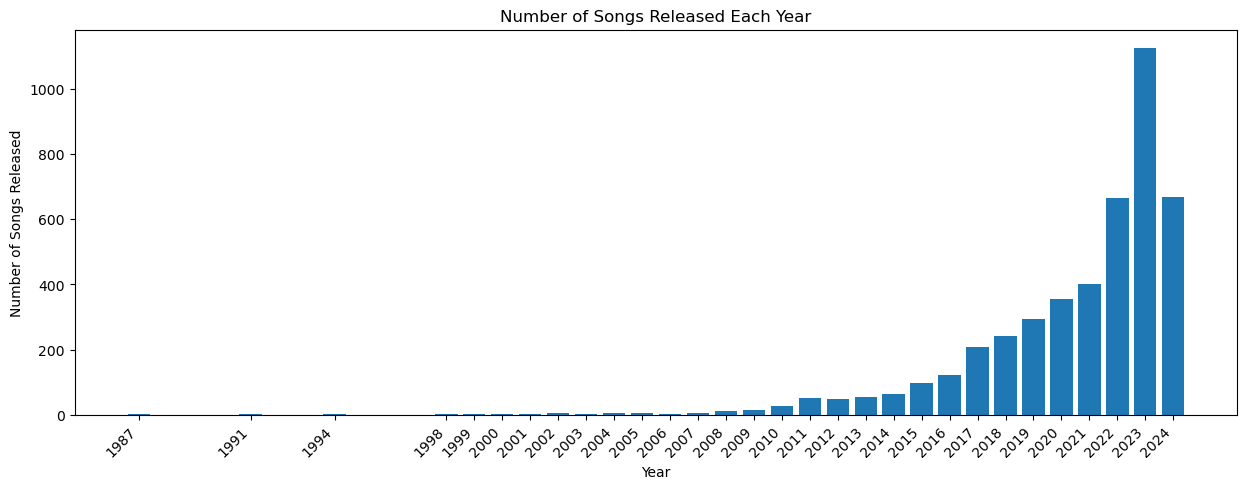

In [38]:
plt.figure(figsize=(15, 5))

years = sorted_songs_per_year.index
number_of_songs = sorted_songs_per_year.values

plt.bar(years, number_of_songs)
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.title('Number of Songs Released Each Year')

plt.xticks(years) 
plt.xticks(rotation=45, ha='right')

plt.show()

The chart clearly shows that the most songs were released in 2023. In 2024 we can see a decline, compared to 2023, but when we look at the years before it, we can say that 2024 is expected to be a new peak for released songs, because we are still in the middle of the year 

How about the months?

In [39]:
release_month = songs['release_date'].dt.month
release_month

0        4
1        5
2        3
3        1
4        5
        ..
4595     9
4596     7
4597     2
4598    11
4599     4
Name: release_date, Length: 4487, dtype: int32

In [40]:
songs_per_month = songs.groupby(release_month)
sorted_songs_per_month = songs_per_month.size().sort_values(ascending=False)
sorted_songs_per_month

release_date
5     502
1     495
3     417
4     414
10    377
6     375
2     358
11    340
9     323
7     311
8     310
12    265
dtype: int64

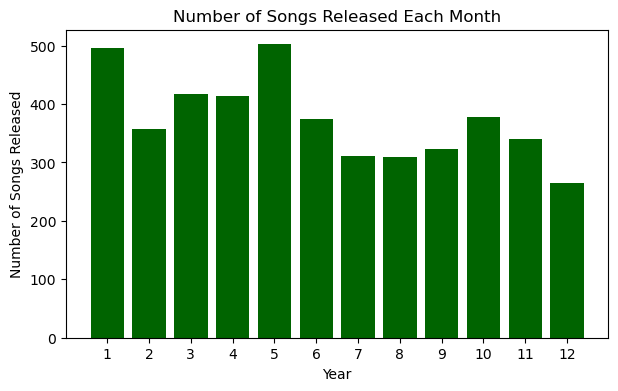

In [41]:
plt.figure(figsize=(7, 4))

months = sorted_songs_per_month.index
occurences = sorted_songs_per_month.values

plt.bar(months, occurences, color='darkgreen')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.title('Number of Songs Released Each Month')

plt.xticks(months)

plt.show()

The chart shows that most songs were released in the month of May. However, the difference with January is not big (only 7 songs). We can assume that singers are most active in May because the summer season is coming, and January is not far behind because that's when the new year starts and it's nice to start with a song аnd positive mood.

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

First of all the columns I need are `apple_music_playlist_count`, `spotify_playlist_count`, `amazon_playlist_count` and `deezer_playlist_count`.

Checking the data types is a must!

In [42]:
songs['apple_music_playlist_count'].dtype # All good

dtype('float64')

In [43]:
songs['spotify_playlist_count'].dtype  # We have a problem here

dtype('O')

In [44]:
songs['amazon_playlist_count'].dtype  # All good

dtype('float64')

In [45]:
songs['deezer_playlist_count'].dtype  # All good

dtype('float64')

So, in general I have a problem with only one of the columns and I need to convert it from an object to a float number.

In [46]:
songs['spotify_playlist_count'] = songs['spotify_playlist_count'].str.replace(',', '')

C:\Users\Цецо\AppData\Local\Temp\ipykernel_14636\3400581913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['spotify_playlist_count'] = songs['spotify_playlist_count'].str.replace(',', '')


In [47]:
songs['spotify_playlist_count'] = pd.to_numeric(songs['spotify_playlist_count'])

C:\Users\Цецо\AppData\Local\Temp\ipykernel_14636\4154644812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['spotify_playlist_count'] = pd.to_numeric(songs['spotify_playlist_count'])


In [48]:
songs['spotify_playlist_count']

0        30716.0
1        28113.0
2        54331.0
3       269802.0
4         7223.0
          ...   
4595     65770.0
4596      4602.0
4597     72066.0
4598     14037.0
4599     32138.0
Name: spotify_playlist_count, Length: 4487, dtype: float64

In [49]:
songs['spotify_playlist_count'].dtype

dtype('float64')

Better now! Ready for work!

In [50]:
pearson_corr = songs[['spotify_playlist_count', 'apple_music_playlist_count', 
                   'deezer_playlist_count', 'amazon_playlist_count']].corr(method='pearson')

In [51]:
pearson_corr

,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
spotify_playlist_count,1.000000,0.685620,0.559852,0.381971
apple_music_playlist_count,0.685620,1.000000,0.775644,0.665573
deezer_playlist_count,0.559852,0.775644,1.000000,0.568779
amazon_playlist_count,0.381971,0.665573,0.568779,1.000000


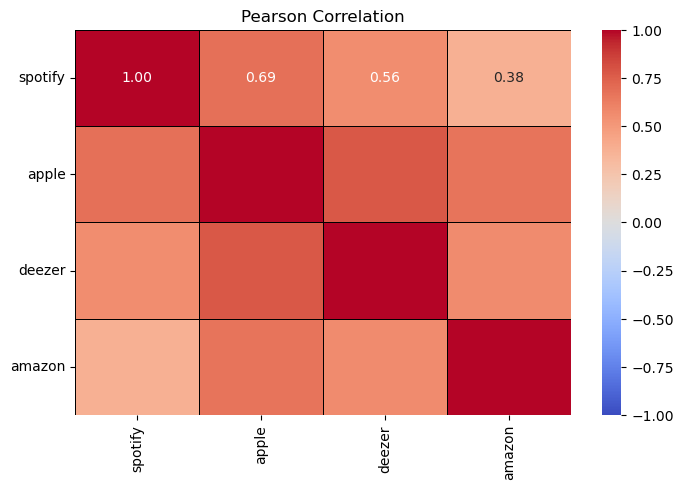

In [52]:
plt.figure(figsize=(8, 5))
ax = sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            linewidths=0.5, linecolor='black')
ax.set_title("Pearson Correlation")

labels = ['spotify', 'apple', 'deezer', 'amazon']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

In [53]:
kendall_corr = songs[['spotify_playlist_count', 'apple_music_playlist_count', 
                   'deezer_playlist_count', 'amazon_playlist_count']].corr(method='kendall')

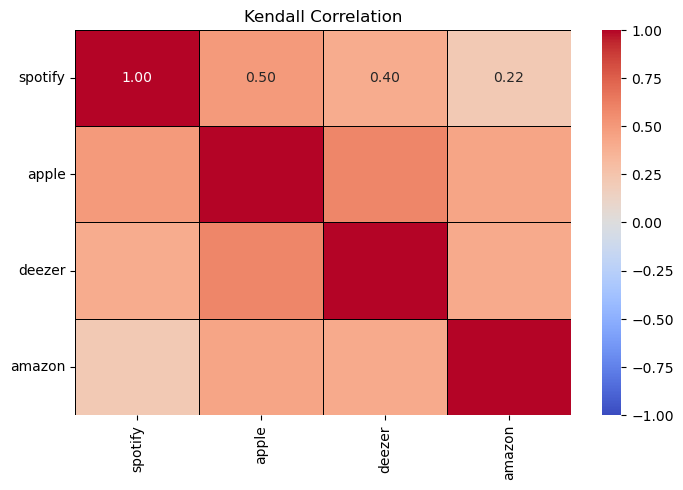

In [54]:
plt.figure(figsize=(8, 5))

ax = sns.heatmap(kendall_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            linewidths=0.5, linecolor='black')
ax.set_title("Kendall Correlation")

labels = ['spotify', 'apple', 'deezer', 'amazon']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

In [55]:
spearman_corr = songs[['spotify_playlist_count', 'apple_music_playlist_count', 
                   'deezer_playlist_count', 'amazon_playlist_count']].corr(method='spearman')

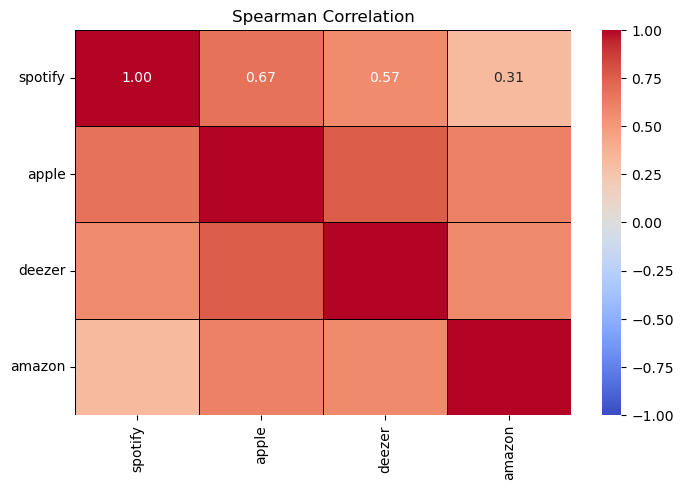

In [56]:
plt.figure(figsize=(8, 5))
ax = sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            linewidths=0.5, linecolor='black')
ax.set_title("Spearman Correlation")

labels = ['spotify', 'apple', 'deezer', 'amazon']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

In [57]:
songs.youtube_views.dtype

dtype('O')

In [58]:
songs.youtube_likes.dtype

dtype('O')

In [59]:
columns_to_convert = ['youtube_likes', 'youtube_views']

for column in columns_to_convert:
    songs[column] = songs[column].str.replace(',', '')
    songs[column] = pd.to_numeric(songs[column])

C:\Users\Цецо\AppData\Local\Temp\ipykernel_14636\128024410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs[column] = songs[column].str.replace(',', '')
C:\Users\Цецо\AppData\Local\Temp\ipykernel_14636\128024410.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs[column] = pd.to_numeric(songs[column])


In [60]:
songs.youtube_likes.dtype

dtype('float64')

In [61]:
songs.youtube_views.dtype

dtype('float64')

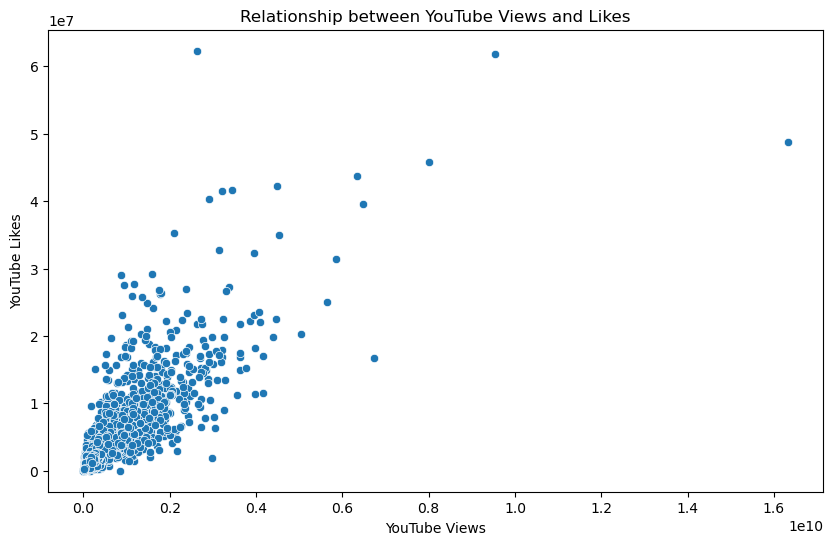

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='youtube_views', y='youtube_likes', data=songs)
plt.title('Relationship between YouTube Views and Likes')
plt.xlabel('YouTube Views')
plt.ylabel('YouTube Likes')
plt.show()

The scatter plot shows that as the number of views increases, the number of likes tends to increase as well, indicating a positive correlation between YouTube views and likes.
There are a few outliers with exceptionally high numbers of views and likes.

<b>What is the mean YouTube views-to-likes ratio?</b>

I first need to calculate this ratio for each song.

In [73]:
songs['views_to_likes_ratio'] = songs['youtube_views'] / songs['youtube_likes']

C:\Users\Цецо\AppData\Local\Temp\ipykernel_14636\73229444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['views_to_likes_ratio'] = songs['youtube_views'] / songs['youtube_likes']


In [74]:
songs['views_to_likes_ratio']

0        49.193553
1        33.368440
2        55.008510
3       103.115892
4        21.081742
           ...    
4595    106.789364
4596    176.507395
4597    185.895100
4598    289.130238
4599    226.375612
Name: views_to_likes_ratio, Length: 4487, dtype: float64

Now, I can compute the mean of the ratios.

In [76]:
mean_ratio = songs['views_to_likes_ratio'].mean()
mean_ratio

165.10399707370502

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


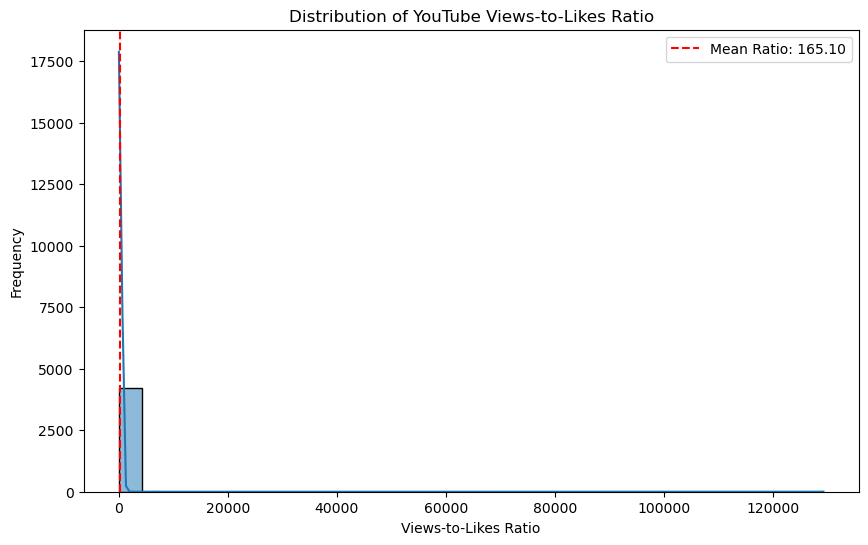

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(songs['views_to_likes_ratio'], bins=30, kde=True)
plt.title('Distribution of YouTube Views-to-Likes Ratio')
plt.xlabel('Views-to-Likes Ratio')
plt.ylabel('Frequency')
plt.axvline(mean_ratio, color='red', linestyle='--', label=f'Mean Ratio: {mean_ratio:.2f}')
plt.legend()
plt.show()

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.